Spectra Tune Lab light source
=============================

<img src="../img/STLAB.png" alt="drawing" width="500"/>

The `.light_stamper(...)` method of the `PupilCore` interface makes it easy to integrate any light source given a suitable geometry. For our own application, we chose to administer light stimuli with a custom-built integrating sphere and Spectra Tune Lab (STLAB: [Ledmotive Technologies, LLC](https://ledmotive.com/))—a spectrally tuneable light engine with 10 LED colour channels, capable of generating a broad range of spectral compositions. STLAB can be controlled programmatically with most languages via its *REST API*, which works with generic HTTP requests. The API includes commands to set a specific spectrum, turn the light off, get readouts from the onboard spectrometer, etc. We opted to work with STLAB because it offers a high level of control over the temporal and spectral properties of light stimuli. 

*PyPlr*'s `stlab.py` module
---------------------------

`stlab.py` provides full native support for STLAB by encapsulating its *REST API* in a `SpectraTuneLab()` device class and streamlining various routines with helper functions. STLAB connects via ethernet to a small computer called the *Light Hub* (a BeagleBone running Linux), which in turn connects via USB to the controlling computer. When all hardware is correctly assembled and the appropriate software installed, establishing a connection to the device is easy (note that a password is required for access to the *Light Hub*): 

In [1]:
from pyplr import stlab
d = stlab.SpectraTuneLab(password='****************')

STLAB device setup complete...


With this handle on the device we can access the methods available from the *REST API*. For example, to blink each of the LEDs in turn at max intensity for ~1 second, we can use the `.set_spectrum_a(...)` method:

In [2]:
from time import sleep

for led in range(10):
    intensities = [0]*10
    intensities[led] = 4095
    d.set_spectrum_a(intensities)
    sleep(1.)
    d.turn_off()
    sleep(1.)

Note that spectrums are defined by passing a list of ten values between 0-4095 (that's one for each LED channel, 12-bit resolution), corresponding to the minimum and maximum output of the device. 

STLAB also has an on-board spectrometer. The easiest way to get data from the spectrometer is with `pyplr.calibrate.SpectraTuneLabSampler`, a subclass of `SpectraTuneLab` with added sampling methods. 

In [3]:
from pyplr.calibrate import SpectraTuneLabSampler

d = SpectraTuneLabSampler(password='****************')
leds = [0,1,2,3,4,5,6,7,8,9]
intensity = [4095]
d.sample(leds=leds, intensities=intensity)
d.make_dfs()
d.stlab_spectra

STLAB device setup complete...
Sampling 10 leds at the following intensities: [4095]
Measurement: 1 / 10, LED: 0, intensity: 4095
Measurement: 2 / 10, LED: 1, intensity: 4095
Measurement: 3 / 10, LED: 2, intensity: 4095
Measurement: 4 / 10, LED: 3, intensity: 4095
Measurement: 5 / 10, LED: 4, intensity: 4095
Measurement: 6 / 10, LED: 5, intensity: 4095
Measurement: 7 / 10, LED: 6, intensity: 4095
Measurement: 8 / 10, LED: 7, intensity: 4095
Measurement: 9 / 10, LED: 8, intensity: 4095
Measurement: 10 / 10, LED: 9, intensity: 4095


,380,385,390,395,400,405,410,415,420,425,...,745,750,755,760,765,770,775,780,led,intensity
0,0.0,0.0,0.0,23.092050,69.099876,163.715586,292.749028,646.445204,1293.727715,2318.856104,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,4095
1,0.0,0.0,0.0,13.482852,10.065324,20.364725,29.868263,65.026672,142.974411,311.837770,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1,4095
2,0.0,0.0,0.0,0.000000,0.000000,1.689246,2.240837,3.999032,7.308575,15.892703,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2,4095
3,0.0,0.0,0.0,0.000000,3.733973,0.000000,1.982641,0.859144,2.412213,7.467946,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3,4095
4,0.0,0.0,0.0,0.000000,0.000000,1.434468,0.956312,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4,4095
5,0.0,0.0,0.0,2.748689,1.536901,1.241343,1.655125,1.448234,2.009794,2.748689,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5,4095
6,0.0,0.0,0.0,0.000000,3.008748,0.000000,4.851946,9.324410,14.420308,14.718472,...,50.823453,73.700784,55.106176,0.0,0.0,0.0,0.0,0.0,6,4095
7,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.007043,2.098007,...,93.403277,85.766531,70.493039,0.0,0.0,0.0,0.0,0.0,7,4095
8,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,8,4095
9,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,9,4095


With these data, we can plot the spectral power distributions of the 10 channels at maximum and their CIE 1931 *xy* chromaticity coordinates, which define the gamut of the device. Note that we can calculate the *xy* chromaticity coordinates quickly by passing the spectra data frames to `stlab.spectra_to_xyz(...)`. 

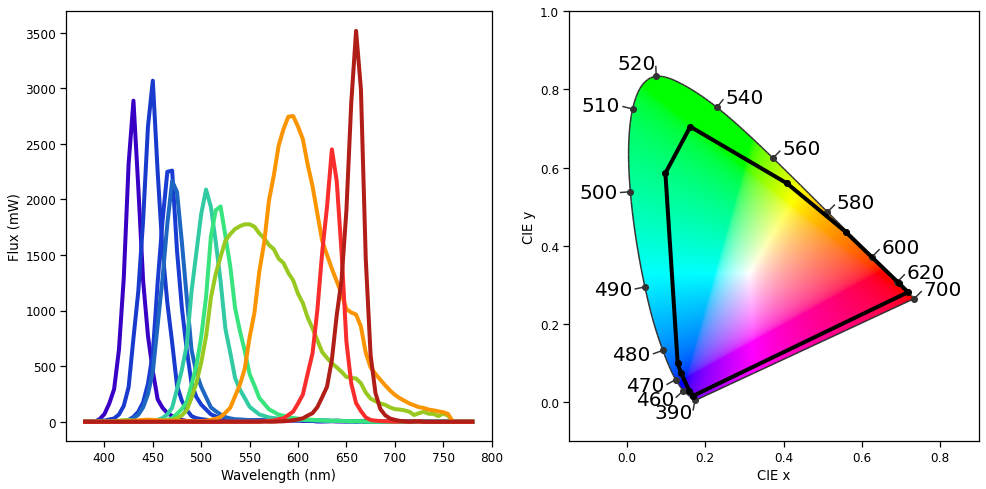

In [4]:
from colour.plotting import plot_chromaticity_diagram_CIE1931
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.1)

# Prepare spectra
spectra = (d.stlab_spectra
            .set_index(['led','intensity']))
xyz = stlab.spectra_to_xyz(spectra, binwidth=5)
xyz = xyz.append(xyz.loc[0]) # join the dots
long_spectra = stlab.spectra_wide_to_long(spectra)

# Set up figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

# Plot SPDs
sns.lineplot(
    x='wavelength', y='flux', 
    data=long_spectra, hue="led", 
    palette=d.rgb_colors, ax=ax1, 
    lw=4, legend=False)

ax1.set_xlabel("Wavelength (nm)")
ax1.set_ylabel("Flux (mW)")

# Plotting the *CIE xy* chromaticity coordinates.
plot_chromaticity_diagram_CIE1931(
    standalone=False, axes=ax2, 
    title=False, show_spectral_locus=True)

ax2.set_xlim((-.15,.9))
ax2.set_ylim((-.1,1))
ax2.plot(xyz["X"], xyz["Y"], color='k',
         lw=4, marker='o', markersize=6)

for item in ax2.texts:
    item.set_fontsize(20)
    
f.tight_layout()

For a more nuanced understanding of the device's output we would need to sample at a range of intensities, such as from minimum to maximum in steps of 63:

```Python
leds = [0,1,2,3,4,5,6,7,8,9]
intensities = [val for val in range(0,4096,65)]
spectra, info = d.sample(leds=leds, intensity=intensities)
```

We do this [elsewhere](./04c_integrating_sphere.ipynb#Calibration) with an [Ocean Optics STS-VIS](https://www.oceaninsight.com/products/spectrometers/microspectrometer/sts-series/sts-vis/) spectrometer in order to create a forward model for the STLAB-sphere rig.

Device timing in standard mode
------------------------------

STLAB queues commands received by the *Light Hub* and processes them when possible. According to the device manual, response times in the standard mode of operation are on the order of around 250 milliseconds. We can test this. 

Execution time summary:
count    400.000000
mean       0.208223
std        0.021075
min        0.179315
25%        0.200251
50%        0.200554
75%        0.207376
max        0.385547
dtype: float64


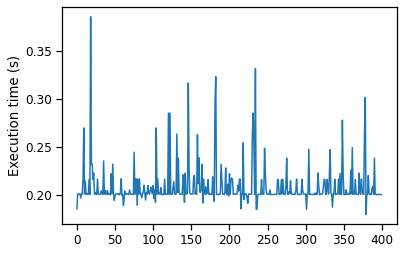

In [5]:
from time import time, sleep

import pandas as pd

on = [4095]*10
off = [0]*10
exec_times = []
for i in range(200):
    t1 = time()
    d.set_spectrum_a(on)
    t2 = time()
    sleep(.2)
    t3 = time()
    d.set_spectrum_a(off)
    t4 = time()
    exec_times.append(t2-t1)
    exec_times.append(t4-t3)
    
exec_times = pd.Series(exec_times)
print('Execution time summary:')
print(exec_times.describe())
ax = exec_times.plot()
ax.set_ylabel('Execution time (s)')

Clearly there is variability. It probably depends on the machine, hardware, other processes, etc., but in our general testing we have seen even bigger delays, with commands sometimes taking up to 5 seconds to execute. Given that we will want to administer light stimuli of a precise duration, the uncertainty here is problematic. Thankfully the STLAB has an *asynchronous* mode of operation which allows for real-time spectral streaming, with a spectral switching time of less than 10 milliseconds (i.e., 1 spectrum every 10 milliseconds). We leverage this mode in order to get the desired control over the temporal characteristics of our light stimuli. 

Playing video files
-------------------

Using the asynchronous mode requires the creation of *dynamic sequence files*, which are essentially JSON files with a particular file structure and a .DSF extension. `stlab.py` has some handy tools for creating video files. For example, we can create a 2-second pulse of bright red light using `stlab.pulse_protocol(...)`:

In [6]:
spec = [0]*10
spec[-1] = 4095
vf_df = stlab.pulse_protocol(pulse_spec=spec,
                             pulse_duration=2000,
                             fname='1s_red_pulse',
                             return_df=True,
                             metadata={'whatever':'info',
                                       'you':'want'})
vf_df

"1s_red_pulse.dsf" saved in the current working directory.


,time,LED-1,LED-2,LED-3,LED-4,LED-5,LED-6,LED-7,LED-8,LED-9,LED-10
0,0,0,0,0,0,0,0,0,0,0,4095
1,2000,0,0,0,0,0,0,0,0,0,4095
2,2000,0,0,0,0,0,0,0,0,0,0
3,2100,0,0,0,0,0,0,0,0,0,0


Calling `stlab.video_file_to_dict(...)`, we can see how the video file looks internally:

In [7]:
stlab.video_file_to_dict('1s_red_pulse.dsf')

{'header': {'version': 1,
  'model': 'VEGA10',
  'channels': 10,
  'spectracount': 4,
  'transitionsCount': 4,
  'fluxReference': 0,
  'repeats': 1},
 'metadata': {'creation_time': '2021-03-24 14:05:04.537285',
  'creator': 'jtm',
  'whatever': 'info',
  'you': 'want',
  'protocol': 'pulse',
  'pulse_spec': '[0, 0, 0, 0, 0, 0, 0, 0, 0, 4095]',
  'pulse_duration': '2000'},
 'spectra': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 4095],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 4095],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 'transitions': [{'spectrum': 0, 'power': 100, 'time': 0, 'flags': 0},
  {'spectrum': 1, 'power': 100, 'time': 2000, 'flags': 0},
  {'spectrum': 2, 'power': 100, 'time': 2000, 'flags': 0},
  {'spectrum': 3, 'power': 100, 'time': 2100, 'flags': 0}]}

Here are some notes on video files based on communications with Ledmotive: 

**1. HEADER**
 - **"version"**, **"models"** and **"channels"** should not be changed, as they are the default settings for the STLAB. This all gets handled by the `stlab.make_video_file(...)` function.
 - **"repeats"** is set to 1 by default, meaning the video will not run endlessly. Setting "repeats" to 0 will cause the video to start again after it finishes and repeat endlessly. 
 - **"spectraCount"** is the number of different spectra used in the video. In this example we used 4 spectra (although only two were unique).
 - **"transitionsCount"** is the total number of transitions in the video. In this example there are 4 different transitions.
 - **"fluxReference"** is reserved for something else, and is fine like this.
 
**2. METADATA** 
 - This is optional and not needed for the video file to work, but it is a good place to store information about the video file. When the file is loaded during runtime this info can then be unpacked and included in any triggers sent to Pupil Capture. Some information is included by default, but any dict passed as \****metadata** to the functions for creating video files will be unpacked into the video file (e.g. {'color':'blue'}). 
 
**3. SPECTRA**
 - These are the values (between 0 and 4095) for each of the 10 channels. Spectra should be stored as a list of lists.
 
**4. TRANSITIONS**
 - **"spectrum"** looks at the index from the list of lists to pick up the proper spectrum. This is set based on the index of the DataFrame passed to `stlab.make_video_file(...)`.
 - **"time"** is the start of the current spectrum in milliseconds time since the start of video file playback. Here the 1st spectrum starts at t=0sec, the 2nd spectrum stats at t=3sec.

Once you've made a video file, playing it is easy:

In [8]:
d.load_video_file('1s_red_pulse.dsf')
d.play_video_file()

video file loaded...
playing video file...


<Response [200]>

Bear in mind that `stlab.pulse_protocol(...)` is just one of a few convenience functions that call an underlying `stlab.make_video_file(...)` function. The latter will turn any dataframe like the one returned above into a video file. Just make sure the column names are the same and that there is at least 10 ms between every consecutive value in the 'time' column (otherwise spectra may be dropped). So it is possible to get creative and produce all kinds of cool sequences.